In [ ]:
import os
import functools
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def load_image(path):
  img = matplotlib.image.imread(path)
  # convert image to tensor and normalize values to <0, 1> domain
  return tf.convert_to_tensor(img, dtype=tf.float32)

def reshape(img):
  img = tf.image.resize(img, (224, 224))
  return img[tf.newaxis ,...]

def inference(model, img):
  reshaped = reshape(img)
  out = model(reshaped)
  return out

def get_model():
  vgg = tf.keras.applications.VGG19(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
  vgg.trainable = False
  model = tf.keras.Model(inputs=vgg.input, outputs=vgg.output)
  return model

TensorShape([1, 224, 224, 3])

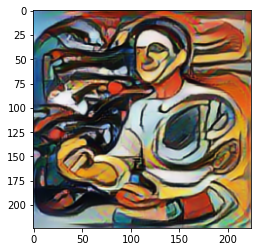

In [ ]:
model = get_model()
img = load_image("/content/drive/MyDrive/Colab Notebooks/5569923-VSZEWCUY-7.jpg/15.png")
img = reshape(img)
plt.imshow(img[0])
img.shape

In [ ]:
style_path = "/content/drive/MyDrive/Colab Notebooks/style"
images_path = "/content/drive/MyDrive/Colab Notebooks/van-Gogh-Starry-Night-90x70-cm-OBRAZ-NA-PLOTNIE.jpg"
style_images = []
images = []
for style_file in os.listdir(style_path):
  style_images.append(load_image("{}/{}".format(style_path, style_file)) / 255.0)

for image in os.listdir(images_path):
  images.append(load_image("{}/{}".format(images_path, image)))

In [ ]:
style_embeddings = []
image_embeddings = []

for image in images:
  output = inference(model, image)
  image_embeddings.append(output)

for style_image in style_images:
  style_embeddings.append(inference(model, style_image))

mean_images = functools.reduce(lambda a, b : a+b, image_embeddings)/len(image_embeddings)

In [ ]:
diff_norms = []

for style_embedding in style_embeddings:
  diff = style_embedding - mean_images
  diff_norms.append(tf.norm(diff))

[<tf.Tensor: shape=(), dtype=float32, numpy=46.324005>, <tf.Tensor: shape=(), dtype=float32, numpy=42.045776>, <tf.Tensor: shape=(), dtype=float32, numpy=33.87707>, <tf.Tensor: shape=(), dtype=float32, numpy=55.58614>, <tf.Tensor: shape=(), dtype=float32, numpy=55.9594>, <tf.Tensor: shape=(), dtype=float32, numpy=53.484943>]


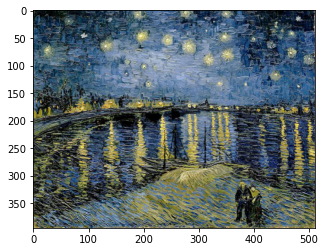

In [ ]:
plt.imshow(style_images[diff_norms.index(min(diff_norms))])
print(diff_norms)